In [2]:
import pygp
import numpy as np

In [63]:
data = np.load('xy.npz')
X = data['X']
y = data['y']
print X
print y

[[ 2.08397043]
 [-0.82101807]
 [-0.6178707 ]
 [-1.18382261]
 [ 0.27408744]
 [ 0.59944173]
 [ 1.76889792]
 [-0.46564555]
 [ 0.58885278]
 [-0.83298221]
 [-0.51210653]
 [ 0.27788314]
 [-0.06587043]
 [-0.82141236]
 [ 0.18539944]
 [-0.85829617]
 [ 0.37078663]
 [-1.40986916]
 [-0.14466841]
 [-0.55329962]]
[ 2.50721853 -0.21750539  0.02024332 -0.42130159  1.11842953 -0.28980512
  1.86022698 -0.34258445  0.02840726 -0.3052106  -0.47671761  1.06117071
  0.2335452  -0.14932212  1.53588071 -0.0670771   0.757132    0.28406853
 -0.25679137 -0.34599644]


In [17]:
gp = pygp.BasicGP(sn=.1, sf=1, ell=.1, mu=0)
gp.add_data(X, y)
#gp.add_data(X, y)

In [58]:
print gp.data[0].shape
print gp.ndata

(20, 1)
20


## Optimisation examples

In [20]:
from scipy.optimize import minimize, rosen, rosen_der

In [26]:
x0 = [1.3, 0.7, 0.8, 1.9, 1.2]

Nelder Mead

In [27]:
res = minimize(rosen, x0, method='Nelder-Mead')
res.x

array([ 0.99910115,  0.99820923,  0.99646346,  0.99297555,  0.98600385])

BFGS

In [28]:
res = minimize(rosen, x0, method='BFGS', jac=rosen_der, options={'gtol': 1e-6, 'disp': True})
res.x

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 52
         Function evaluations: 64
         Gradient evaluations: 64


array([ 1.,  1.,  1.,  1.,  1.])

BFGS with callback

In [30]:
X_y = ([], [])
def callbackF(Xi):
    global X_y
    X_y[0].append(Xi)
    X_y[1].append(rosen(Xi))

res = minimize(rosen, x0, method='BFGS',
               jac=rosen_der,
               options={'gtol': 1e-6, 'disp': True}, callback=callbackF)
res.x

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 52
         Function evaluations: 64
         Gradient evaluations: 64


array([ 1.,  1.,  1.,  1.,  1.])

In [32]:
X, y = X_y

### Convex hull

In [36]:
from scipy.spatial import ConvexHull

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
X = np.array(X)
y = np.array(y)
print X.shape, y.shape

(52, 5) (52,)


In [50]:
hull = ConvexHull(X)

In [52]:
hull.vertices.shape

(51,)

In [55]:
points = np.random.rand(30, 2)  
hull = ConvexHull(points)
hull.vertices

array([19, 16,  3,  4, 28, 15, 22,  6, 10], dtype=int32)

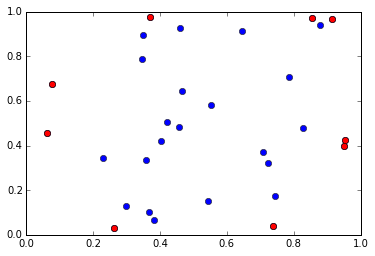

In [56]:
plt.plot(points[:,0], points[:,1], 'o')
plt.plot(points[hull.vertices,0], points[hull.vertices,1], 'ro')